In [18]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()
x, y = digits.images, digits.target
print(x.shape)
print(y.shape)
print({i:len(y[y==i]) for i in range(10)})
print(digits.images.shape, digits.data.shape)

(1797, 8, 8)
(1797,)
{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}
(1797, 8, 8) (1797, 64)


In [19]:
x[15]

array([[  0.,   5.,  12.,  13.,  16.,  16.,   2.,   0.],
       [  0.,  11.,  16.,  15.,   8.,   4.,   0.,   0.],
       [  0.,   8.,  14.,  11.,   1.,   0.,   0.,   0.],
       [  0.,   8.,  16.,  16.,  14.,   0.,   0.,   0.],
       [  0.,   1.,   6.,   6.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   5.,  16.,   3.,   0.,   0.],
       [  0.,   1.,   5.,  15.,  13.,   0.,   0.,   0.],
       [  0.,   4.,  15.,  16.,   2.,   0.,   0.,   0.]])

In [20]:
y[5]

5

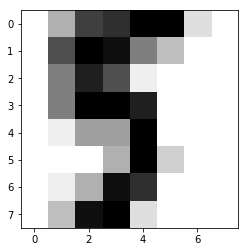

In [21]:
plt.imshow(x[15], cmap=plt.cm.gray_r)
plt.show()

In [32]:
x = x.reshape((x.shape[0], -1))

In [23]:
x.shape

(1797, 64)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [25]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=10, eta0=0.01, shuffle=True)
clf.fit(x_train_std, y_train)

y_pred = clf.predict(x_test_std)
print("誤サンプル数: %d" % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print("正解率: %.2f" % accuracy_score(y_test, y_pred))

誤サンプル数: 39
正解率: 0.93


In [26]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear")
clf.fit(x_train_std, y_train)

y_pred = clf.predict(x_test_std)
print("誤サンプル数: %d" % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print("正解率: %.2f" % accuracy_score(y_test, y_pred))

誤サンプル数: 12
正解率: 0.98


In [27]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel="linear", C=1)
scores = cross_val_score(clf, x, y, scoring="accuracy", cv=10)
print(scores)
print("Accuracy: %0.2F(+/- %0.2f)" % (scores.mean(), scores.std()*2))

[ 0.93513514  0.99453552  0.9281768   0.96111111  0.96089385  0.98882682
  0.96648045  0.97752809  0.93220339  0.96590909]
Accuracy: 0.96(+/- 0.04)


In [28]:
# このaccuracyがなぜここまで低いのか
from sklearn.model_selection import cross_val_score
clf = SVC(kernel="rbf", C=100)
scores = cross_val_score(clf, x, y, scoring="accuracy", cv=10)
print(scores)
print("Accuracy: %0.2F(+/- %0.2f)" % (scores.mean(), scores.std()*2))

[ 0.48648649  0.61748634  0.4198895   0.47222222  0.51955307  0.49162011
  0.54189944  0.60674157  0.58757062  0.46022727]
Accuracy: 0.52(+/- 0.13)


In [29]:
x_sample = np.random.rand(10, 2)
y_sample = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])
print(x_sample)
print(y_sample)

[[ 0.8291819   0.02759655]
 [ 0.48363054  0.75938303]
 [ 0.2359805   0.07701752]
 [ 0.22331284  0.14815104]
 [ 0.31841234  0.73622003]
 [ 0.71903492  0.12143238]
 [ 0.17754928  0.80171074]
 [ 0.74076317  0.84796379]
 [ 0.0805304   0.40346443]
 [ 0.342614    0.97305901]]
[0 0 0 0 0 0 0 1 1 1]


In [30]:
from sklearn.model_selection import StratifiedKFold

scores = []
skf = StratifiedKFold(n_splits=10)

for train,test in skf.split(x,y):
    svm=SVC(kernel="linear", C=1)
    svm.fit(x[train], y[train])
    scores.append(svm.score(x[test], y[test]))
    
print(scores)
print("Accuracy: %0.2f(+/- %0.2f)" % (np.array(scores).mean(), np.array(scores).std()*2))

[0.93513513513513513, 0.99453551912568305, 0.92817679558011046, 0.96111111111111114, 0.96089385474860334, 0.98882681564245811, 0.96648044692737434, 0.97752808988764039, 0.93220338983050843, 0.96590909090909094]
Accuracy: 0.96(+/- 0.04)


In [67]:
?SVC

In [14]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {"kernel":["rbf", "linear", "sigmoid", "poly"], 
                                       "gamma":[1e-2, 1e-3, 1e-4, 1e-5], 
                                        "C":[1e-2, 1e-1, 1, 10, 100, 1000]}

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring="%s_macro" % score, n_jobs=10)
    clf.fit(x_train, y_train)
    print(clf.best_params_)
    print("Grid scores on development　set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip (means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for precision


/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Grid scores on development　set:
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.982 (+/-0.006) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.988 (+/-0.010) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.006) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.977 (+/-0.015) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.006) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.011 (+/-0.000) for {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
0.982 (+/-0.006) for {'C': 0.01, 'gamma': 1e

In [34]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                                           n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                                train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                                 test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, "o-", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

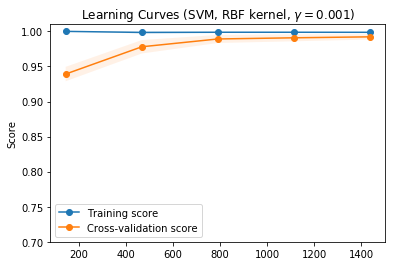

In [35]:
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
estimator = SVC(gamma=0.001, C=1.0)
plot_learning_curve(estimator, title, x, y, (0.7, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.linear_model import Perceptron
title = "Learning Curves (Perceptron)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = Perceptron(max_iter=10, eta0=0.01, shuffle=True)
plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)